In [43]:
pip install powerlaw


Avalanches Sizes: [0, 1, 0, 2, 1, 0, 1, 0, 3, 0, 3, 0, 0, 4, 2, 1, 0, 6, 2, 0, 1, 11, 0, 1, 2, 1, 0, 0, 11, 0, 6, 1, 0, 3, 0, 8, 1, 0, 6, 0, 4, 0, 5, 2, 0, 1, 0, 1, 13, 0, 25, 0, 6, 0, 1, 11, 0, 1, 0, 2, 1, 13, 1, 18, 1, 0, 1, 0, 2, 29, 0, 2, 0, 12, 1, 0, 0, 3, 9, 0, 26, 1, 0, 5, 14, 2, 0, 1, 11, 0, 1, 0, 2, 10, 2, 0, 1, 0, 1, 16, 0, 2, 1, 5, 0, 47, 3, 0, 3, 0, 1, 2, 0, 1, 0, 50, 0, 13, 0, 3, 0, 0, 13, 0, 2, 0, 1, 0, 7, 2, 0, 1, 13, 0, 24, 1, 13, 18, 0, 1, 0, 19, 3, 7, 1, 3, 17, 0, 5, 0, 2, 1, 0, 1, 44, 1, 0, 1, 0, 27, 10, 1, 22, 0, 0, 5, 5, 0, 14, 1, 3, 0, 1, 0, 2, 1, 0, 40, 0, 1, 0, 0, 41, 1, 10, 3, 1, 0, 2, 3, 0, 0, 1, 117, 1, 0, 3, 0, 13, 14, 0, 2, 1, 0, 2, 1, 40, 46, 2, 0, 1, 2, 0, 1, 16, 0, 1, 7, 0, 0, 41, 1, 0, 0, 2, 1, 25, 3, 0, 8, 1, 0, 4, 1, 0, 3, 1, 0, 0, 2, 1, 0, 151, 0, 2, 1, 17, 0, 1, 4, 0, 5, 0, 1, 5, 0, 0, 2, 1, 0, 1, 0, 35, 17, 2, 0, 1, 11, 1, 0, 0, 60, 0, 18, 2, 0, 1, 1, 0, 108, 4, 1, 10, 1, 1, 0, 4, 0, 3, 48, 1, 0, 0, 5, 7, 31, 3, 0, 2, 1, 2, 0, 35, 2, 1, 0, 3, 0, 5,

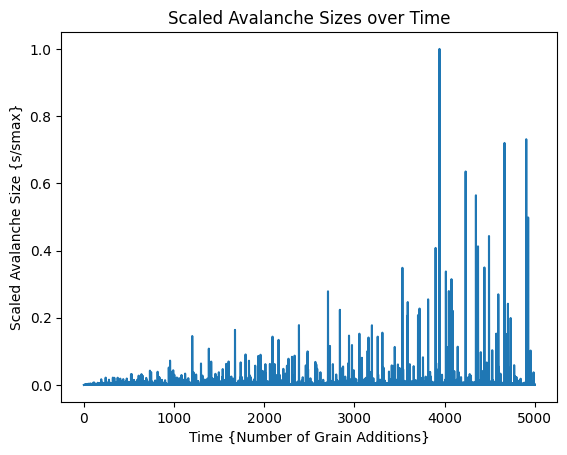

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(L):
    grid = np.zeros(L)
    thresholds = np.random.uniform(1, 2, size=(L,))
    return grid, thresholds

def relax_site(grid, thresholds, i):
    avalanche_size = 0
    if i == 0:
        grid[i] -= 2
        grid[i + 1] += 1
    elif i == len(grid) - 1:
        grid[i] -= 1
        grid[i - 1] += 1
    else:
        grid[i] -= 2
        grid[i + 1] += 1
        grid[i - 1] += 1

    avalanche_size += 1
    thresholds[i] = random.choice([1, 2])
    return avalanche_size

def run_oslo_simulation(L, num_steps):
    grid, thresholds = initialize_grid(L)
    avalanche_sizes = []

    for step in range(num_steps):
        avalanche_size = 0
        grid[0] += 1
        while any(si > ti for si, ti in zip(grid, thresholds)):
            grid_relax = False
            for i in range(L):
                if grid[i] > thresholds[i]:
                    grid_relax = True
                    avalanche_size += relax_site(grid, thresholds, i)
            if not grid_relax:
                break
        avalanche_sizes.append(avalanche_size)

    return avalanche_sizes

def plot_scaled_avalanches(avalanche_sizes):
    timesteps = np.arange(1, len(avalanche_sizes) + 1)
    smax = max(avalanche_sizes)
    scaled_sizes = np.array(avalanche_sizes) / smax

    plt.plot(timesteps, scaled_sizes)
    plt.title('Scaled Avalanche Sizes over Time')
    plt.xlabel('Time {Number of Grain Additions}')
    plt.ylabel('Scaled Avalanche Size {s/smax}')
    plt.show()

L = 64
num_steps = 5000
avalanche_sizes = run_oslo_simulation(L, num_steps)
print("Avalanches Sizes:", avalanche_sizes)

plot_scaled_avalanches(avalanche_sizes)


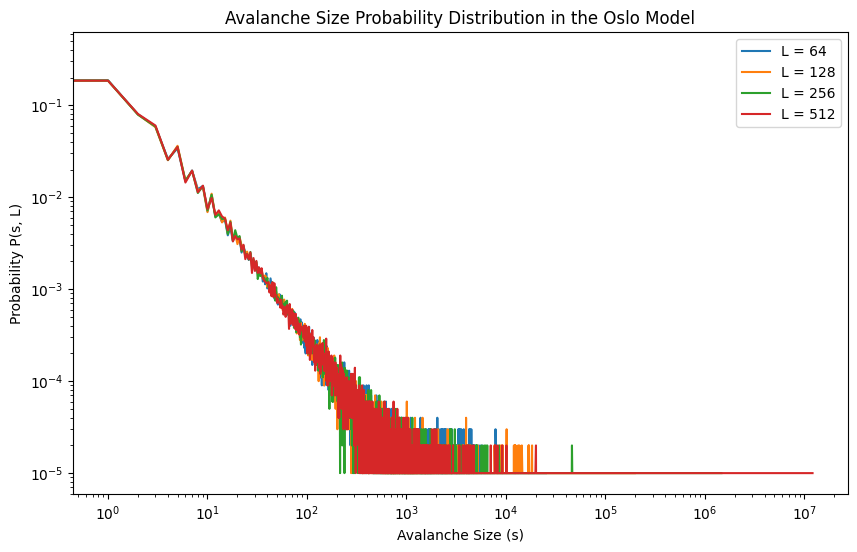

In [4]:
import random
import matplotlib.pyplot as plt

def initialize_oslo_system(L):
    s = np.random.uniform(1, 2, size=L)
    thresholds = np.random.uniform(1, 2, size=L)
    return s, thresholds

def relax_oslo_site(s, thresholds, i):
    avalanche_size = 0
    if i == 0:
        s[i] -= 2
        s[i + 1] += 1
    elif i == len(s) - 1:
        s[i] -= 1
        s[i - 1] += 1
    else:
        s[i] -= 2
        s[i + 1] += 1
        s[i - 1] += 1

    avalanche_size += 1
    thresholds[i] = random.choice([1, 2])
    return avalanche_size

def run_oslo_simulation(L, num_steps):
    s, thresholds = initialize_oslo_system(L)
    avalanche_sizes = []

    for step in range(num_steps):
        avalanche_size = 0
        s[0] += 1

        while any(si > ti for si, ti in zip(s, thresholds)):
            srelax = False
            for i in range(L):
                if s[i] > thresholds[i]:
                    srelax = True
                    avalanche_size += relax_oslo_site(s, thresholds, i)
            if not srelax:
                break

        avalanche_sizes.append(avalanche_size)

    return avalanche_sizes

def plot_oslo_avalanche_distribution(L_values, num_steps):
    plt.figure(figsize=(10, 6))

    for L in L_values:
        avalanche_sizes = run_oslo_simulation(int(L), num_steps)
        unique_sizes, counts = np.unique(avalanche_sizes, return_counts=True)
        probabilities = counts / np.sum(counts)

        plt.loglog(unique_sizes, probabilities, label=f'L = {L}')

    plt.title('Avalanche Size Probability Distribution in the Oslo Model')
    plt.xlabel('Avalanche Size (s)')
    plt.ylabel('Probability P(s, L)')
    plt.legend()
    plt.show()

# Example usage:
L_values = np.logspace(6, 9, num=4, base=2, dtype=int)  # Logarithmically spaced system lengths
num_steps = 1000000  # Number of steps

plot_oslo_avalanche_distribution(L_values, num_steps)
